<a href="https://colab.research.google.com/github/ramaoutlook/AI-ML-GENAI-NLP-LLM-Projects/blob/main/Deep%20Learning%20Projects/MNIST%20Handwritten%20Digit%20Classification%20using%20Deep%20Learning%20NN/MNIST_Handwritten_Digit_Classification_using_Deep_Learning_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
type(X_train)

numpy.ndarray

Training data = 60000 images

Test data = 10,000 images

Imae dimension ->28X28

Grayscale Image ->1 Channel

In [5]:
# printing the 10th image
X_train[10]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [6]:
X_train[10].shape

(28, 28)

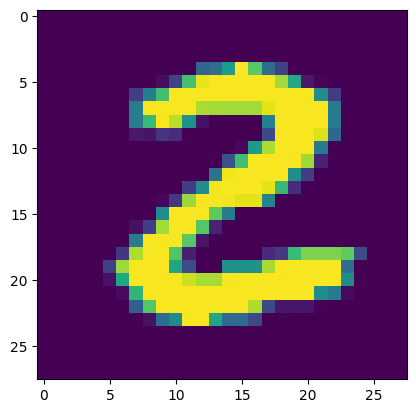

2


In [7]:
# Displaying the image
plt.imshow(X_train[25])
plt.show()

#Print the correponding label
print(y_train[25])

Image Labels

In [8]:
import numpy as np

unique_elements, counts = np.unique(y_test, return_counts=True)
print("Unique elements:", unique_elements)
print("Counts:", counts)

Unique elements: [0 1 2 3 4 5 6 7 8 9]
Counts: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

We can use these labels as such or we can also apply one Hot Encoding

All the iimages have the same dimensions in this dataset, if not, we have to resize all the images to a common dimentions

In [10]:
# scaling the values
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [11]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# compiling the Neural Network

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# training the Neural Network
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8473 - loss: 0.5179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9542 - loss: 0.1572
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1124
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9789 - loss: 0.0708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9881 - loss: 0.0418
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0356
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0318


The Training data accuracy = 99.01%

**Accuracy on Test data:**

In [14]:
loss, accuracy  = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1329
Test Loss: 0.12251800298690796
Test Accuracy: 0.9684000015258789


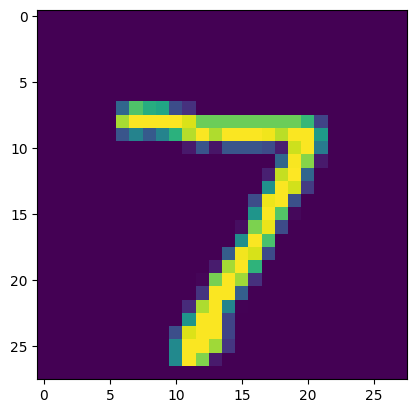

In [15]:
# First data  point in X_test
plt.imshow(X_test[0])
plt.show()

In [16]:
y_test[0]

np.uint8(7)

In [17]:
y_pred = model.predict(X_test_scaled)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.5121927e-03, 3.7594789e-04, 9.9552996e-02, 9.2575574e-01,
       1.2254233e-07, 3.2779303e-01, 7.6299256e-07, 9.9999917e-01,
       3.2840564e-03, 9.0442985e-01], dtype=float32)

In [18]:
y_pred.shape

(10000, 10)

In [19]:
y_pred[0]

array([4.5121927e-03, 3.7594789e-04, 9.9552996e-02, 9.2575574e-01,
       1.2254233e-07, 3.2779303e-01, 7.6299256e-07, 9.9999917e-01,
       3.2840564e-03, 9.0442985e-01], dtype=float32)

model.predict() gives the prediction probability of each class for that data  point

In [20]:
# Converting the prediction probabilities to class label
np.argmax(y_pred[0])

np.int64(7)

In [21]:
# Converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

y_test --->True Labels

y_pred ---> predicted labels

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    3,    2,    1,    4,    0,    0,    4],
       [   0, 1121,    1,    3,    1,    2,    4,    0,    3,    0],
       [   1,    3,  992,   13,    8,    1,    2,    8,    4,    0],
       [   0,    0,    3,  990,    2,    5,    0,    4,    1,    5],
       [   0,    2,    3,    1,  958,    1,    6,    2,    0,    9],
       [   2,    0,    0,   15,    2,  862,    5,    0,    3,    3],
       [   2,    2,    0,    1,    8,    5,  937,    1,    2,    0],
       [   0,    0,    5,    6,    2,    1,    0,  998,    0,   16],
       [   2,    1,    4,   29,   10,    8,   11,    7,  889,   13],
       [   2,    1,    0,    5,   27,    3,    0,    6,    0,  965]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

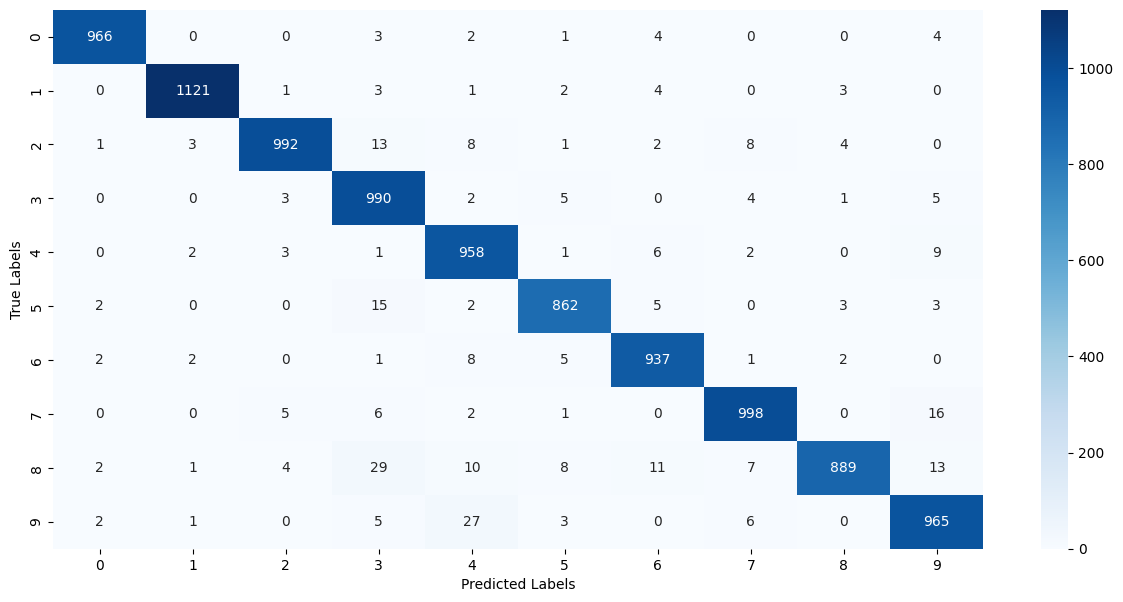

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [24]:
import cv2

Building predictive system

In [25]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [26]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


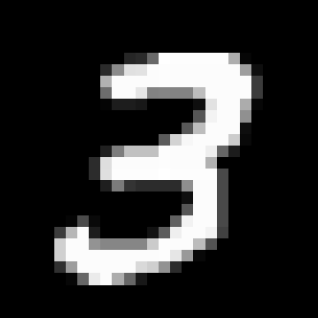

In [27]:
cv2_imshow(input_image)

In [28]:
input_image.shape

(318, 318, 3)

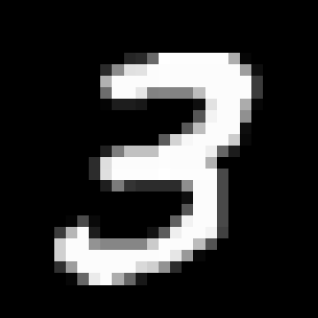

In [29]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [30]:
grayscale.shape

(318, 318)

In [37]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [38]:
cv2_imshow(input_image_resize)

In [39]:
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [40]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[2.4748281e-13 8.2407254e-09 2.5439032e-04 1.0000000e+00 2.0852618e-14
  7.1170383e-05 3.9367663e-19 1.8802336e-06 5.1471186e-03 4.7194517e-01]]


In [41]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**Predictive System**

Enter the path of the image to be predicted: /content/MNIST_digit.png


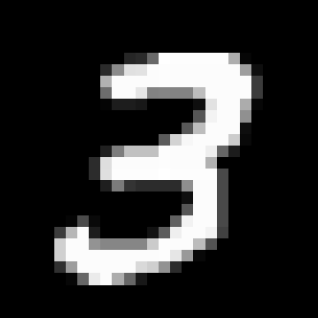

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The Handwritten Digit is recognised as  3


In [42]:
input_image_path = input('Enter the path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)

# Handwritten Digit Recognition using Neural Networks

This project implements a handwritten digit recognition system using a simple neural network built with TensorFlow and Keras. The model is trained on the widely used MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0-9).

## Project Overview

The goal of this project is to classify handwritten digits with high accuracy. The process involves loading the dataset, preprocessing the images, building and training a neural network model, evaluating its performance, and finally, creating a predictive system to recognize digits from new images.

## Techniques Used

*   **Neural Networks:** A multi-layer perceptron (MLP) is used for classifying the digits.
*   **TensorFlow and Keras:** These libraries are used for building, training, and evaluating the neural network model.
*   **MNIST Dataset:** The standard dataset for handwritten digit recognition is utilized.
*   **Image Preprocessing:**
    *   **Grayscale Conversion:** Color images are converted to grayscale.
    *   **Resizing:** Images are resized to a consistent 28x28 resolution.
    *   **Scaling:** Pixel values are scaled to a range between 0 and 1.
*   **Confusion Matrix:** A confusion matrix is used to visualize the performance of the model and identify misclassifications.
*   **Matplotlib and Seaborn:** These libraries are used for data visualization, including displaying images and the confusion matrix.
*   **OpenCV (cv2):** Used for image loading, grayscale conversion, and resizing.

## Implementation Steps

1.  **Load the Dataset:** The MNIST dataset is loaded using `keras.datasets.mnist.load_data()`.
2.  **Explore the Data:** The shape and type of the dataset are examined, and examples of the images and their corresponding labels are displayed.
3.  **Preprocess the Data:**
    *   The pixel values of the training and testing images are scaled to the range [0, 1] by dividing by 255.
4.  **Build the Neural Network Model:**
    *   A sequential Keras model is created with a `Flatten` layer to convert the 28x28 images into a 1D array.
    *   Two dense layers with ReLU activation functions are added as hidden layers.
    *   An output dense layer with a sigmoid activation function is used for the 10 classes (digits 0-9).
5.  **Compile the Model:** The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.
6.  **Train the Model:** The model is trained on the scaled training data for a specified number of epochs.
7.  **Evaluate the Model:** The model's performance is evaluated on the scaled test data, and the loss and accuracy are reported.
8.  **Make Predictions:** The trained model is used to predict the digit for individual images from the test set.
9.  **Visualize Predictions:** The predicted labels are compared with the true labels, and a confusion matrix is generated and visualized using a heatmap to understand the model's performance across different classes.
10. **Build a Predictive System:** A system is created to take a new image as input, preprocess it, and predict the handwritten digit using the trained model.

## How to Run the Project

1.  Clone the repository to your local machine.
2.  Make sure you have the necessary libraries installed (TensorFlow, Keras, NumPy, Matplotlib, Seaborn, OpenCV). You can install them using pip: